In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

In [33]:
df = pd.read_csv("SpotifyData.csv")
grouped = df.groupby('year').apply(lambda x: x.sort_values(['year'], ascending=True))
df['year'].value_counts()

2012    115
2017    111
2001    108
2018    107
2010    107
2014    104
2005    104
2011     99
2016     99
2015     99
2003     97
2008     97
2004     96
2006     95
2007     94
2002     90
2019     89
2013     89
2009     84
2000     74
1999     38
2020      3
1998      1
Name: year, dtype: int64

In [34]:
# group the data frame by the 'year' column and sort the groups based on the values in that column
grouped = df.groupby('year').apply(lambda x: x.sort_values(['year'], ascending=True))

# reset the index of the resulting data frame
grouped = grouped.reset_index(drop=True)

print(grouped)

                     artist                                            song  \
0             Missy Elliott                                        Hot Boyz   
1                 blink-182                            All The Small Things   
2              Donell Jones  U Know What's Up (feat. Lisa "Left Eye" Lopes)   
3        Christina Aguilera                                   I Turn to You   
4     Red Hot Chili Peppers                                       Otherside   
...                     ...                                             ...   
1995               Anuel AA                                           China   
1996            Post Malone                                         Circles   
1997               t.A.T.u.                         All The Things She Said   
1998             Will Smith                                          Switch   
1999                    NSG                                         Options   

      duration  year  popularity  danceability  ene

In [35]:
#Drop Instrumentalness, acousticness, speechness, key, 
grouped.drop(['instrumentalness', 'acousticness', 'speechiness', 'key'], axis = 1, inplace=True)
grouped.dropna(axis=0, inplace=True)
grouped.describe()

,duration,year,popularity,danceability,energy,loudness,mode,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,-5.512435,0.553500,0.181216,0.551690,120.122557
std,39136.569008,5.85996,21.335577,0.140416,0.152745,1.933482,0.497254,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,-20.514000,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,-6.490250,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,-5.285000,1.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,-4.167750,1.000000,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,-0.276000,1.000000,0.853000,0.973000,210.851000


              duration      year  popularity  danceability    energy  \
duration      1.000000 -0.316534    0.050617     -0.060057 -0.078763   
year         -0.316534  1.000000   -0.003825      0.033532 -0.108644   
popularity    0.050617 -0.003825    1.000000     -0.003546 -0.014021   
danceability -0.060057  0.033532   -0.003546      1.000000 -0.104038   
energy       -0.078763 -0.108644   -0.014021     -0.104038  1.000000   
loudness     -0.079912  0.017479    0.030632     -0.033315  0.651016   
mode         -0.003848 -0.007358   -0.021353     -0.067528 -0.040651   
liveness      0.024941 -0.027037   -0.009856     -0.126413  0.156761   
valence      -0.116870 -0.209365   -0.016142      0.403178  0.334474   
tempo        -0.028603  0.076867    0.014288     -0.173418  0.153719   

              loudness      mode  liveness   valence     tempo  
duration     -0.079912 -0.003848  0.024941 -0.116870 -0.028603  
year          0.017479 -0.007358 -0.027037 -0.209365  0.076867  
popularity  

<AxesSubplot:>

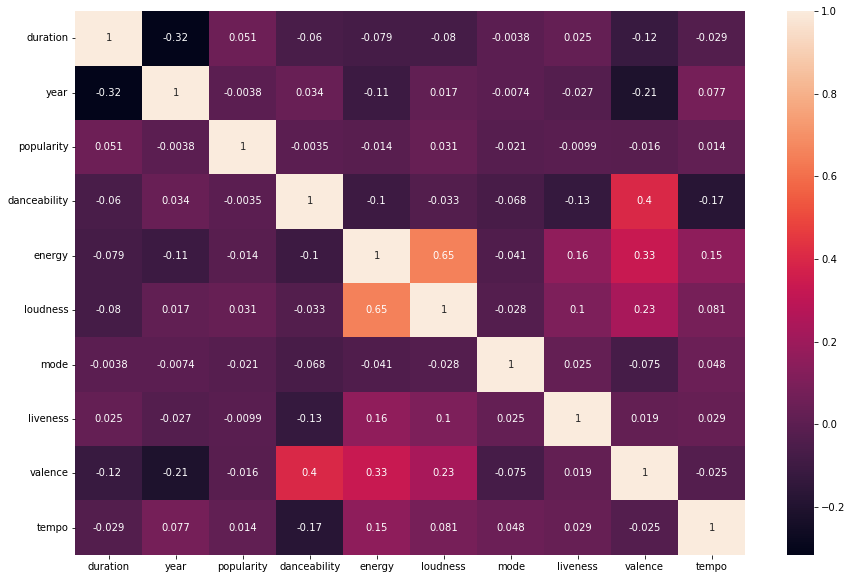

In [36]:
cor = grouped.corr()
print(cor)
plt.figure(figsize= (15,10))
sns.heatmap(cor, annot=True)